# Projet Data
## _DIDIER Léo - HAAS Lucas  - EKOBE Nicolas - PIQUE Valentin - MOHR Antoine_

## Livrable 3 - Présentation de l'ensemble de la démarche de la solution

## Modélisation du problème algorithmique

### Sujet

Le but de cette étude est de générer une tournée de livraison (problème du VRP). Le problème algorithmique consiste donc à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

Vous devrez proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème. L’implémentation se fera sur une version de base du problème, à laquelle vous pourrez ajouter des contraintes supplémentaires, rendant le problème plus réaliste, mais aussi plus dur à traiter.

Par ailleurs, vous devrez effectuer une étude statistique du comportement de votre méthode de résolution, faisant apparaitre ses performances (qualité de solution, temps de convergence). Idéalement, des statistiques prédictives permettent d’extrapoler ce comportement sur des cas d’usages que vos ordinateurs seuls ne pourraient traiter.


### Spécificités et contraintes

L'objectif est de minimiser le temps de la tournée. Le temps de la tournée correspond à la différence entre le départ du premier camion, et l'arrivée du dernier camion au dépôt.

#### Choix des contraintes

<h6>Contraintes du problème de base</h6>
<ol>
    <li>La tournée de livraison doit passer <i>au minimum</i> une fois par chaque ville </li>
    <li>La tournée de livraison doit commencer et se terminer sur le même point (le dépôt)</li>
    <li>Le trafic doit être pris en compte (pour toutes heures)</li>
</ol>
<h6>Contraintes supplémentaires optionnelles</h6>
<ol>
    <li>La livraison doit tenir compte de "fenêtre de livraison" pour chaque ville (plage de temps sur laquelle la livraison est autorisée) </li>
    <li>Plusieurs camions disponibles, ayant chacun une capacité prédéfinie. Certains camions ne pouvant livrer que certains objets. </li>
    <li>Point de collecte spécifique </li>
    <li>Chaque livraison dure un certain temps</li>
</ol>

### Définition mathématique du problème

Soit le graphe G non orienté $$G=(V,E)$$

$x_{ijk}$ égale à 1 si le véhicule k parcourt l'arc $(v_i, v_j)$, noté plus simplement $(i,j)$
. 
L'ensemble des sommets est noté $V = {\{v1,...,vn\}}$

Les constantes du problème sont les suivantes :
- $n$ nombre de clients (ou sommets)
- $m$ nombre de véhicules
- $c_{ijt}$ le coût de l'arête entre les sommets $i$ et $j$ à l'heure $t$(distance ou temps de parcours / trafic)

#### A termes certaines contraintes seront ajoutées :
- $Q$ capacité des véhicules
- $q_i$ demande du client $i$


- $[a_i,b_i]$ où $a_i$ représente l'heure d'arrivée au plus tôt dans une ville, et $b_i$ l'heure d'arrivée au plus tard
- $t_i$ l'heure d'arrivée dans la ville $i$
- $\Delta t_j$ le temps passé sur un point de livraison $j$
- Tel que 

$ x_{ijk} \in{[0,1} ] \space et \space ∀0 \leq \{i,j\} \leq n$

$1 \leq k \leq m $

$t \in [0,24]$
<hr/>


La fonction objectif du problème d'optimisation est définie telle que :

$$Minimiser \sum \limits _{i=1}^n \sum \limits _{j=1}^n \sum \limits _{t=1}^{24} c_{ijt} \sum \limits _{k=1}^m x_{ijk}$$

$s.c :$

Les clients doivent être desservis une et une seule fois :
$$ \sum \limits _{i=1}^n \sum \limits _{k=1}^m x_{ijk} = 1 \,∀ 1 \leq j \leq n$$
$$ \sum \limits _{j=1}^n \sum \limits _{k=1}^m x_{ijk} = 1 \,∀ 1 \leq i \leq n$$

Chaque tournée commence et se termine au dépôt:
$$\sum \limits _{j=1}^n x_{0jk} = 1 \space∀ 1\leq k \leq m $$ 
$$\sum \limits _{i=1}^n x_{i0k}=1 \space ∀ 1\leq k \leq m $$ 




#### A termes certaines contraintes seront ajoutées :

Contraintes de capacité :

 $$\sum \limits _{i=1}^n q_i \sum \limits _{j=1}^n x_{ijk} \leq Q_k \space \space ∀1 \leq k \leq m $$ 


Contraintes de fenêtre de livraison :

 $$t_j \geq t_i + t_{ij} - x_{ijk}\Delta t_j $$ 
 $$t_j \leq t_i + t_{ij} + x_{ijk}\Delta t_j $$ 

 
 $$a_i \leq t_i \leq b_i$$


### Etude de complexité du problème

Le problème du voyage de commerce est NP-complet car il est possible de vérifier une solution en temps polynomial et tous les autres problèmes de la classe NP se ramènent à celui-ci via une réduction polynomiale. Il donc également NP-difficile. Le VRP étant au moins aussi difficile que le TSP, il est également NP-difficile.

Richard M. Karp a montré en 1972 que le problème était NP-complet, dans son article "Reducibility Among Combinatorial Problems".

Ce problème d'optimisation n'admet pas encore à ce jour d'algorithme permettant de trouver une solution exacte rapidement dans tous cas. Il est donc nécessaire de parcourir tous les chemins  𝑛  possibles, ce qui revient à une complexité asymptotique de :  𝑂(𝑛!) 
Le nombre de possibilités s'élève donc à  𝑛!  ( 𝑛  factorielle). Pour  𝑛=3 , cela fait 6 possibilités. Pour 10 villes, cela fait 3,6 millions de combinaisons possibles et pour 20 villes 2,4.10^18 combinaisons possibles !

En conséquence du nombre important de possibilités, le temps de résolution d'un algorithme de résolution exacte sera trop important. Nous allons donc utiliser un algorithme qui ne nous donnera pas forcement le résultat exact mais une très bonne estimation en temps raisonnable : les méta-heuristiques.

## Explication de la méthode de résolution

Nous avons choisi d'utiliser plusieurs métaheuristique pour répondre aux besoins de ce problèmes afin de pouvoir comparer l'efficacité de ces méthodes.
Cette comparaison nous semble pertinente afin de comparer l'incidence de la modification des différents paramètres. Nous pourrons ainsi en déduire la méthode la plus adaptée dans chaque cas de figures.

Nous avons ainsi choisi d'utiliser et d'implémenter les métaheuristiqus suivantes :
<ul>
    <li><b>Recherche Tabou (Tabu-search)</b> : + Permet d'éviter de rester bloquer dans un optimum local / - Consommation de mémoire </li>
    <li><b>Recuit simulé (Simulated Annealing)</b> : + Permet d'éviter de rester bloquer dans un optimum local / - Choix des nombreux paramètres </li>
   
D'autres méthodes pourront être éventuellement étudiées et ajoutées par la suite à titre de comparaison : algorithme génétique, GRASP, VND, ...

<hr/> 


<h6>Recherche Tabou :</h6>
 
Utilise une méthode de génération de voisinage 
Utilise la recherche tabou pour explorer le voisinage et choisir la position dans ce voisinage qui minimise notre fonction objectif. Pour éviter de rester piégé dans un minimum local, on utilise une liste FIFO (tabou), qui conserve les solutions déjà explorées.

Exemple d'implémentation :
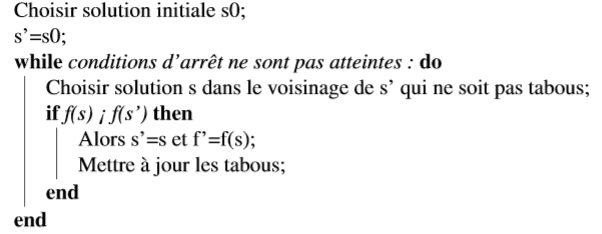
<hr/>

<h6>Recuit simulé :</h6>
 
S'inspire de l'alternance chauffage/refroidissement pour faire varier l'énergie d'un materiau dans le milieu de la métallurgie. On utilise cette méthode pour trouver l'ensemble des extremas d'une fonction et ainsi trouver l'optimum global.


Exemple d'implémentation tel que :

E est une fonction calculant l'énergie de l'état s, k est l'index de l'étape en cours, e est l'energie
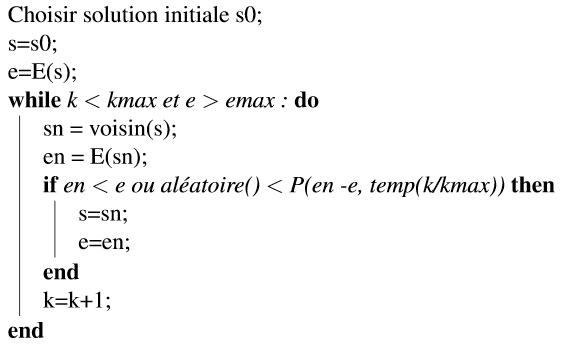
<hr/>

## Présentation de la solution

### Bibliothèques Python

#### Google OR Tools

OR-Tools est une suite logicielle open source mettant a disposition un grand nombre de solutions d'optmisation répondant entre autre à notre problème via la bibliotèque python. On a donc pu implémenter les méthaheuristiques Recherche Tabou et Recuit Simulé.

### Les Algorithmes

#### Connexions à la base

#### Demonstration

In [ ]:
from vrp import VRP
from cvrp import CVRP
from ortools.constraint_solver import routing_enums_pb2

from load_data import from_file_to_adj_matr
from load_data import get_particular_info

algos_metaheuristic = [
   routing_enums_pb2.LocalSearchMetaheuristic.TABU_SEARCH,
   routing_enums_pb2.LocalSearchMetaheuristic.SIMULATED_ANNEALING,
]

timeout = 15 # in s
cvrpOrVrp = 'cvrp'
random = True

mat, capacity, cities_nb, vehicules_nb, demand_matrix, coords = from_file_to_adj_matr('../data/A-VRP/A-n33-k6.vrp')
if cvrpOrVrp == 'vrp':
        # VRP
        vrp = VRP(vehicules_nb,cities_nb)
        if random:
            vrp.create_data_model()
        else:
            vrp.pass_matrix(mat)
        #print(vrp.data)
        
        
    elif cvrpOrVrp == 'cvrp':
        # CVRP
        vrp = CVRP(vehicules_nb,cities_nb)
        if random:
            vrp.create_data_model()
        else:
            vrp.pass_matrix(mat, demand_matrix,capacity)
        #print(vrp.data)

    # Résoud le problème du VRP/CVRP
    for strategy in algos_heuristic:
            solution = vrp.solve(strategy, timeout, useTimeout=True, useHeuristic=True)
            if not random:
                print("Solution attendue : " + str(cost))
            print("Solution obtenue : " + str(solution[1]))
            print(solution)

## Etude Statistique

### Statistiques comparatives

Nous avons jugé pertinent de comparer les statistiques issues de nos deux alorogithmes.

Dans un premier temps, pour 1000 solutions max, on compare le temps d'execution en fonction du nombre de vehicules (pour 30 villes) :

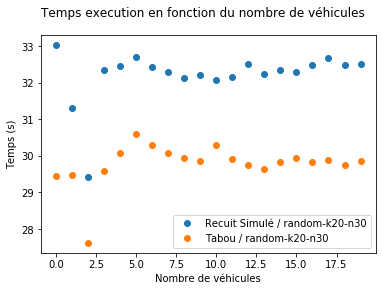

### Statistiques supplémentaires

#### Analyse prédictive